In [1]:
#importing libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [4]:
#importing the dataset

In [5]:
df1=pd.read_csv('crimes.csv')

In [6]:
df1.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [7]:
#creating a copy of original
df=df1.copy()
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
df["STATE/UT"]=le.fit_transform(df['STATE/UT'])

In [11]:
df["DISTRICT"]=le.fit_transform(df['DISTRICT'])

In [12]:
df.dtypes

STATE/UT                                               int32
DISTRICT                                               int32
YEAR                                                   int64
MURDER                                                 int64
ATTEMPT TO MURDER                                      int64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              int64
RAPE                                                   int64
CUSTODIAL RAPE                                         int64
OTHER RAPE                                             int64
KIDNAPPING & ABDUCTION                                 int64
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            int64
KIDNAPPING AND ABDUCTION OF OTHERS                     int64
DACOITY                                                int64
PREPARATION AND ASSEMBLY FOR DACOITY                   int64
ROBBERY                                                int64
BURGLARY                                               int64
THEFT                   

In [13]:
#from the above dataset we came to the
#result that it a type of linear regression and our target variable will be TOTAL IPC CRIMES

In [14]:
df.shape

(1435, 33)

In [15]:
#visualizing the data

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

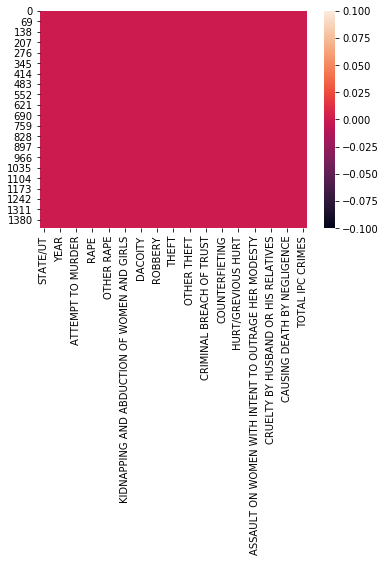

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   STATE/UT                                             1435 non-null   int32
 1   DISTRICT                                             1435 non-null   int32
 2   YEAR                                                 1435 non-null   int64
 3   MURDER                                               1435 non-null   int64
 4   ATTEMPT TO MURDER                                    1435 non-null   int64
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            1435 non-null   int64
 6   RAPE                                                 1435 non-null   int64
 7   CUSTODIAL RAPE                                       1435 non-null   int64
 8   OTHER RAPE                                           1435 non-null   int64
 9   KIDNAPPI

In [19]:
df.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [20]:
df.describe()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,...,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,18.541463,350.647387,2001.501045,99.640418,86.275958,9.743554,45.223693,0.004181,45.219512,61.793728,...,31.155401,747.751916,19.056446,94.866899,27.736585,137.152613,0.264808,168.956098,1995.343554,4947.230662
std,10.246280,200.344974,0.500173,377.967548,359.424159,53.560336,165.450758,0.064549,165.438456,233.395031,...,114.876613,2922.367509,93.412458,378.961918,149.409620,532.831267,3.137857,703.718349,7067.165217,17040.389761
min,0.000000,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,177.500000,2001.000000,21.000000,11.000000,0.000000,6.000000,0.000000,6.000000,8.000000,...,3.000000,42.000000,1.000000,9.000000,0.000000,9.000000,0.000000,1.000000,245.000000,781.500000
50%,19.000000,354.000000,2002.000000,41.000000,30.000000,2.000000,17.000000,0.000000,17.000000,21.000000,...,10.000000,206.000000,5.000000,30.000000,2.000000,37.000000,0.000000,49.000000,721.000000,1946.000000
75%,28.000000,530.500000,2002.000000,74.000000,63.000000,6.000000,37.000000,0.000000,37.000000,46.000000,...,25.000000,543.000000,15.000000,71.000000,13.500000,104.000000,0.000000,136.500000,1479.000000,3711.000000
max,34.000000,673.000000,2002.000000,7601.000000,7964.000000,1243.000000,2891.000000,1.000000,2891.000000,4330.000000,...,1915.000000,39839.000000,2211.000000,7118.000000,2575.000000,7365.000000,83.000000,10125.000000,94923.000000,191799.000000


Text(0.5, 1.0, 'State-crime graph')

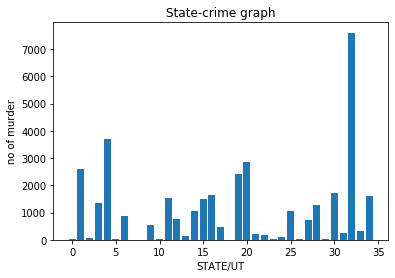

In [21]:
plt.bar(df["STATE/UT"],df["MURDER"])
plt.xlabel("STATE/UT")
plt.ylabel("no of murder")
plt.title("State-crime graph")

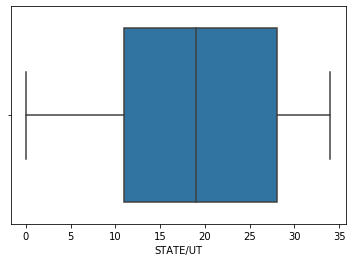

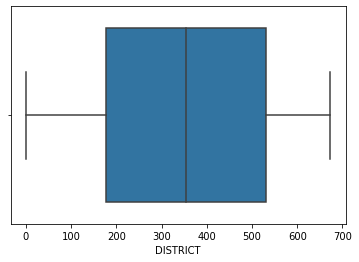

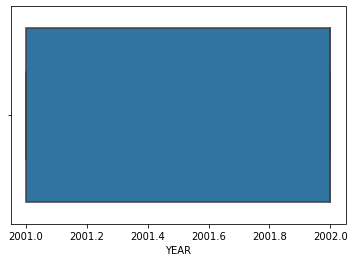

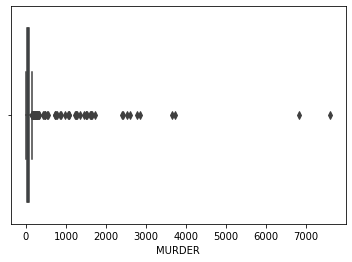

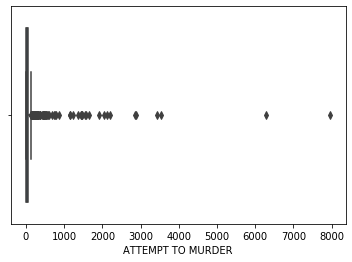

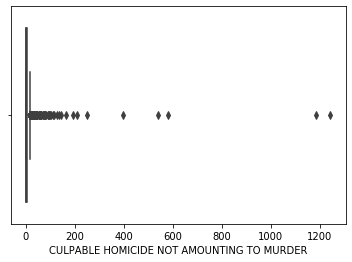

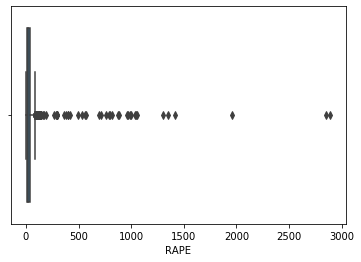

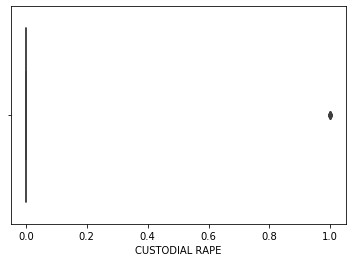

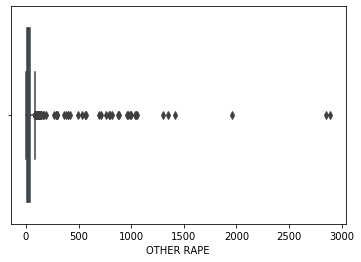

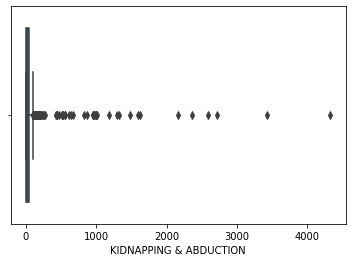

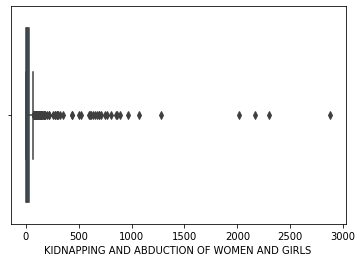

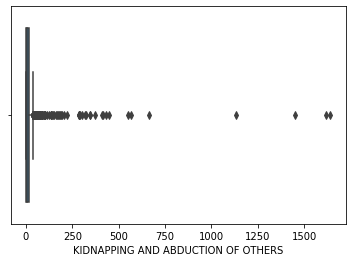

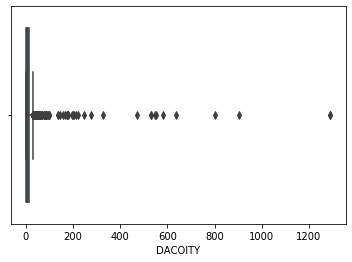

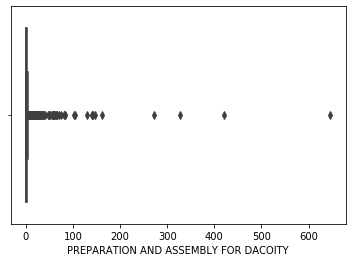

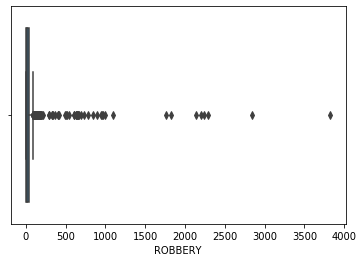

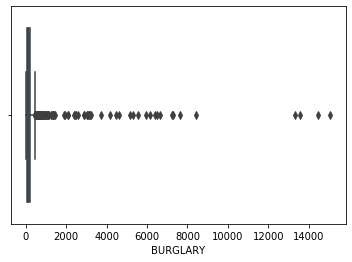

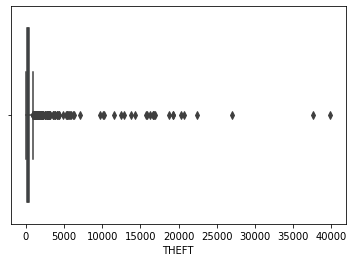

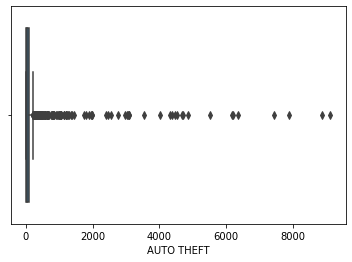

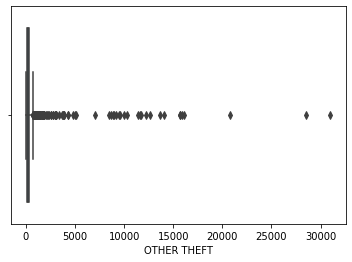

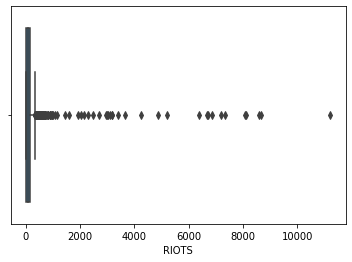

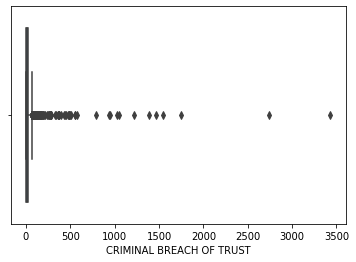

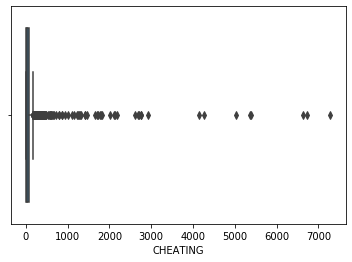

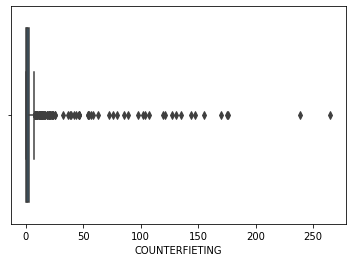

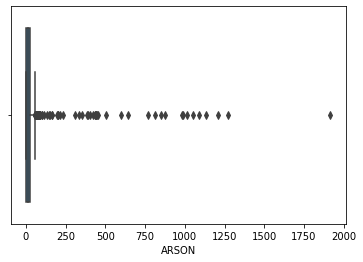

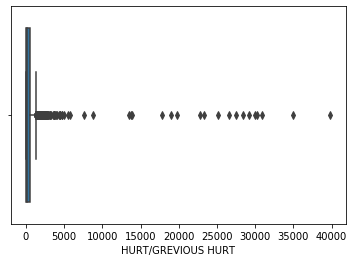

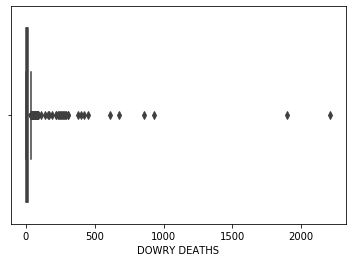

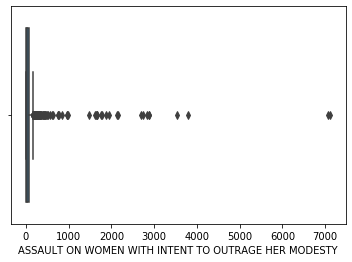

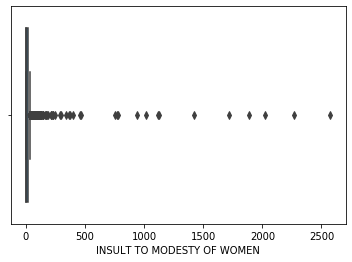

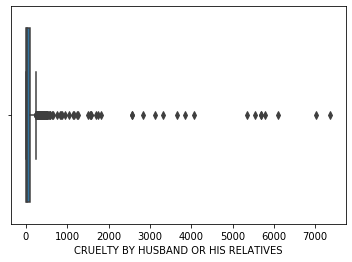

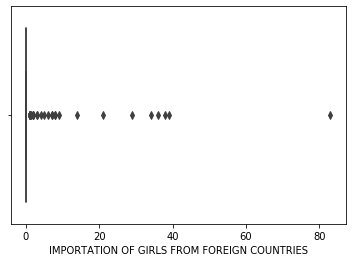

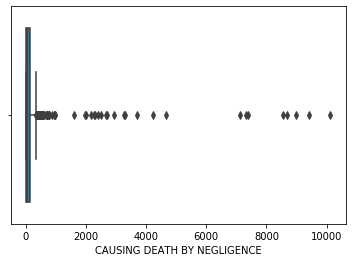

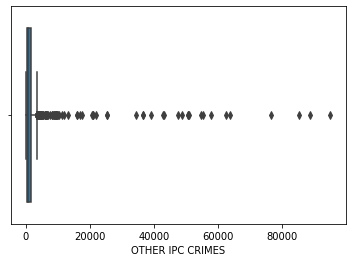

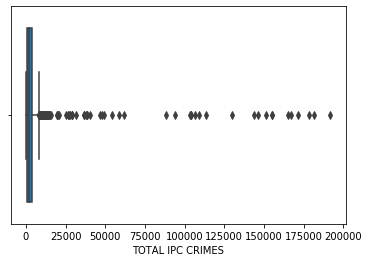

In [22]:
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])

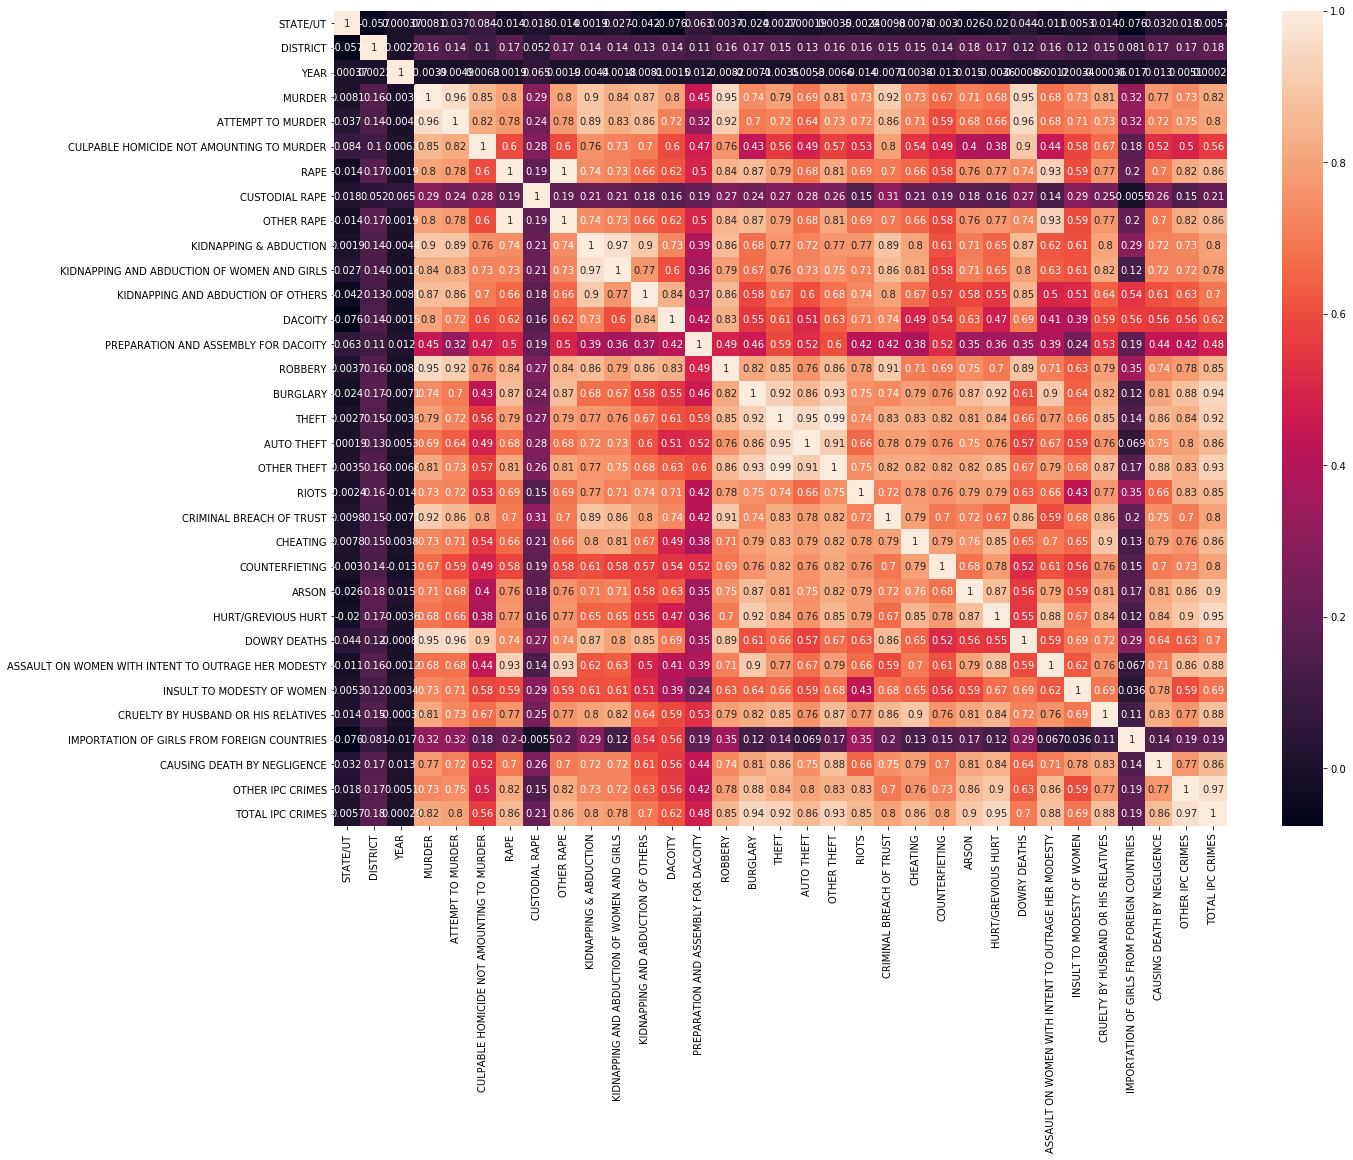

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [24]:
df.skew()

STATE/UT                                               -0.171089
DISTRICT                                               -0.055299
YEAR                                                   -0.004186
MURDER                                                 12.351714
ATTEMPT TO MURDER                                      13.664271
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              17.924292
RAPE                                                   10.694898
CUSTODIAL RAPE                                         15.383937
OTHER RAPE                                             10.695656
KIDNAPPING & ABDUCTION                                 10.788286
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            11.147944
KIDNAPPING AND ABDUCTION OF OTHERS                     12.876403
DACOITY                                                11.808534
PREPARATION AND ASSEMBLY FOR DACOITY                   15.420738
ROBBERY                                                10.735146
BURGLARY                 

In [26]:
#standardizing the data

In [27]:
x=df.drop("TOTAL IPC CRIMES",axis=1)
x.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES
0,1,2,2001,101,60,17,50,0,50,46,...,1,30,1131,16,149,34,175,0,181,1518
1,1,23,2001,151,125,1,23,0,23,53,...,8,69,1543,7,118,24,154,0,270,754
2,1,128,2001,101,57,2,27,0,27,59,...,9,38,2088,14,112,83,186,0,404,1262
3,1,138,2001,80,53,1,20,0,20,25,...,2,23,795,17,126,38,57,0,233,1181
4,1,183,2001,82,67,1,23,0,23,49,...,3,41,1244,12,109,58,247,0,431,2313


In [28]:
y=df["TOTAL IPC CRIMES"].values
y=y.reshape(-1,1)

In [29]:
y.shape

(1435, 1)

In [30]:
x.shape

(1435, 32)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
std=StandardScaler()

In [33]:
x=std.fit_transform(x)

In [34]:
x

array([[-1.71258046, -1.74084193, -1.00209278, ..., -0.08442089,
         0.01712063, -0.0675674 ],
       [-1.71258046, -1.63598619, -1.00209278, ..., -0.08442089,
         0.14363577, -0.17571067],
       [-1.71258046, -1.11170747, -1.00209278, ..., -0.08442089,
         0.33411924, -0.10380389],
       ...,
       [-0.0528633 ,  1.39484408,  0.99791159, ..., -0.08442089,
        -0.24017421, -0.2817307 ],
       [ 0.72818007,  0.69081266,  0.99791159, ..., -0.08442089,
         0.0299143 ,  0.00660416],
       [ 0.72818007,  1.39484408,  0.99791159, ..., -0.08442089,
         0.0299143 ,  0.00660416]])

In [35]:
x.shape

(1435, 32)

In [36]:
x=pd.DataFrame(data=x)

In [37]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-1.71258,-1.740842,-1.002093,0.003598,-0.073131,0.135529,0.028879,-0.064798,0.028906,-0.067693,...,-0.191862,-0.010061,0.131189,-0.032731,0.142896,0.041936,0.071055,-0.084421,0.017121,-0.067567
1,-1.71258,-1.635986,-1.002093,0.135931,0.107777,-0.163304,-0.134369,-0.064798,-0.134354,-0.037691,...,0.195526,0.329552,0.272219,-0.129112,0.061065,-0.025018,0.031630,-0.084421,0.143636,-0.175711
2,-1.71258,-1.111707,-1.002093,0.003598,-0.081481,-0.144627,-0.110184,-0.064798,-0.110167,-0.011974,...,0.250867,0.059603,0.458777,-0.054149,0.045226,0.370008,0.091707,-0.084421,0.334119,-0.103804
3,-1.71258,-1.061776,-1.002093,-0.051981,-0.092614,-0.163304,-0.152508,-0.064798,-0.152494,-0.157701,...,-0.136521,-0.071017,0.016173,-0.022022,0.082182,0.068717,-0.150480,-0.084421,0.091040,-0.115269
4,-1.71258,-0.837085,-1.002093,-0.046688,-0.053649,-0.163304,-0.134369,-0.064798,-0.134354,-0.054835,...,-0.081180,0.085727,0.169869,-0.075567,0.037307,0.202624,0.206230,-0.084421,0.372500,0.044964


In [38]:
y=std.fit_transform(y)

In [39]:
y=pd.DataFrame(data=y)

In [40]:
y.head()

,0
0,-0.046566
1,-0.048269
2,0.051118
3,-0.106093
4,0.091566


In [41]:
x.skew()

0     -0.171089
1     -0.055299
2     -0.004186
3     12.351714
4     13.664271
5     17.924292
6     10.694898
7     15.383937
8     10.695656
9     10.788286
10    11.147944
11    12.876403
12    11.808534
13    15.420738
14    10.735146
15     9.593612
16     8.829041
17     7.950815
18     9.244167
19     8.830445
20    12.475482
21     9.301389
22     8.369800
23     9.099526
24     8.987726
25    16.616028
26    12.000932
27    11.667794
28     9.372180
29    18.082856
30    10.282344
31     8.467342
dtype: float64

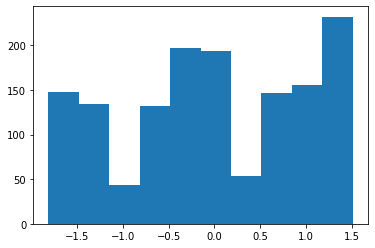

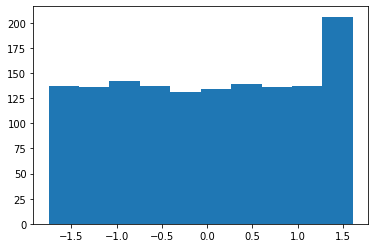

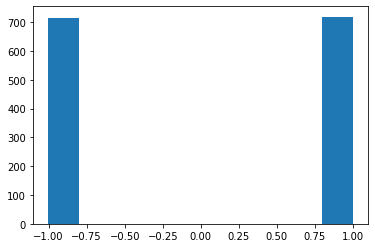

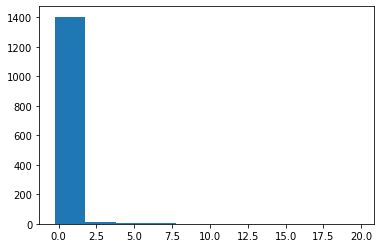

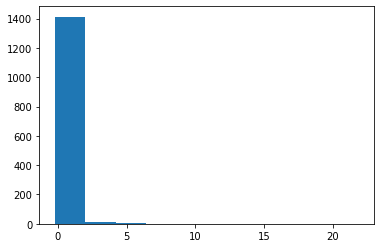

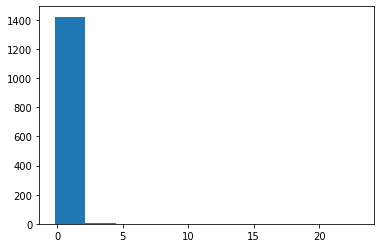

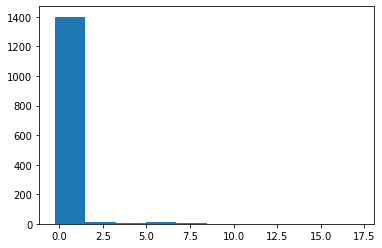

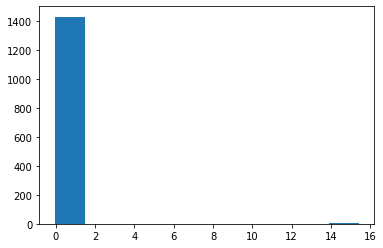

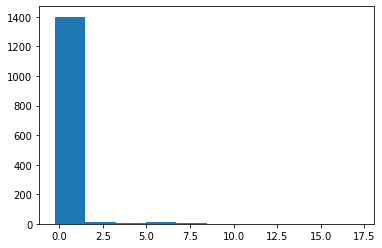

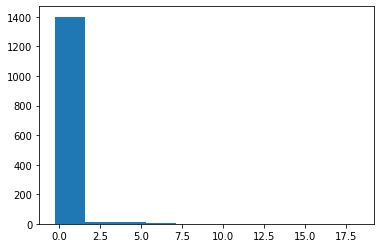

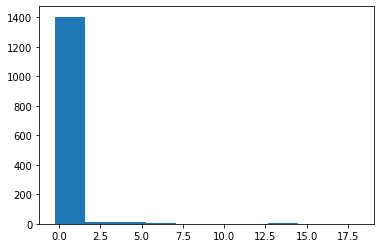

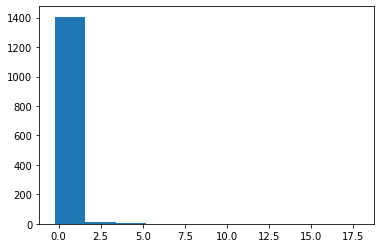

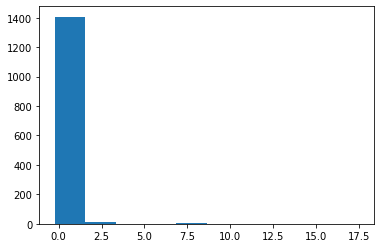

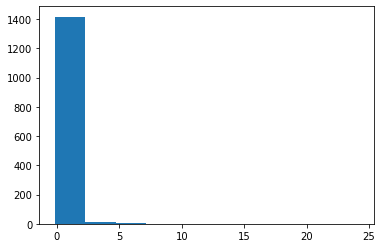

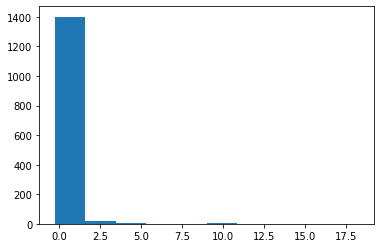

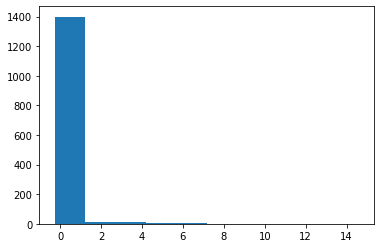

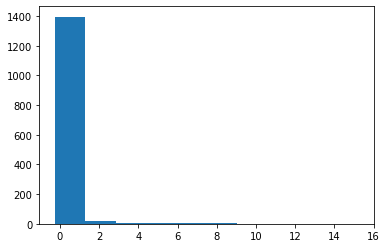

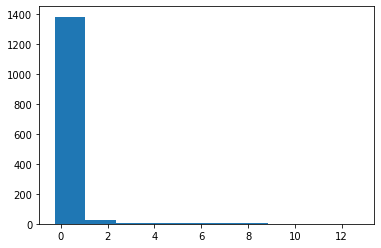

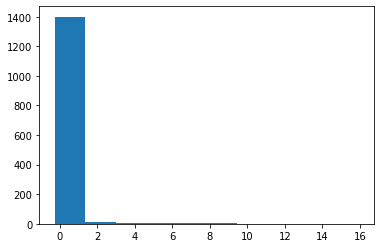

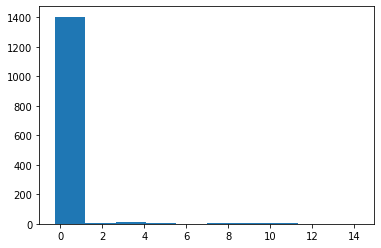

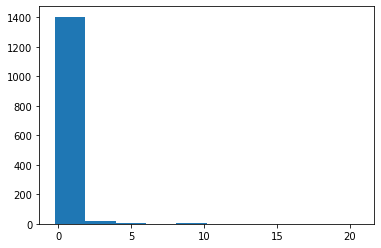

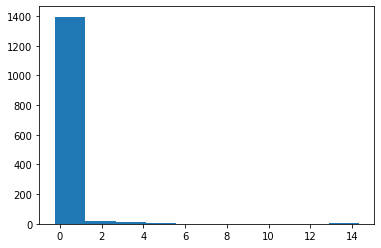

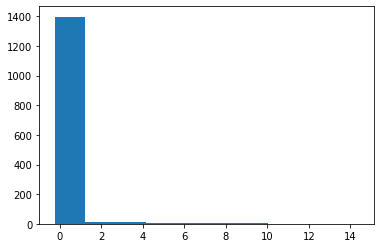

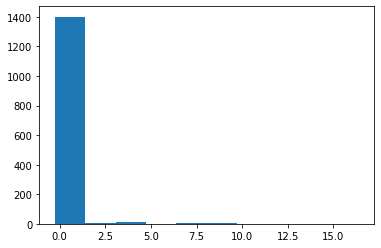

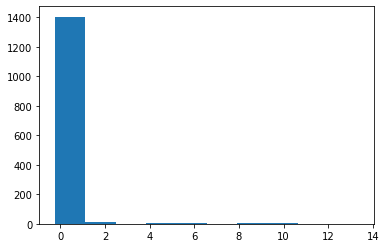

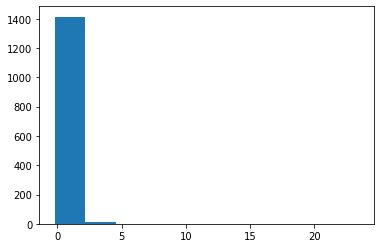

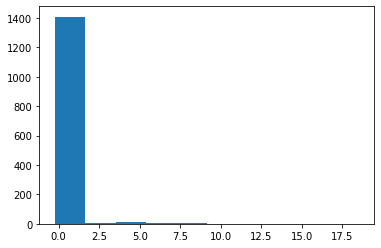

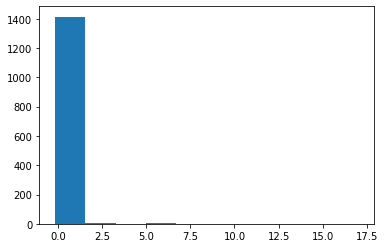

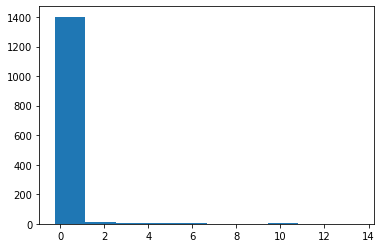

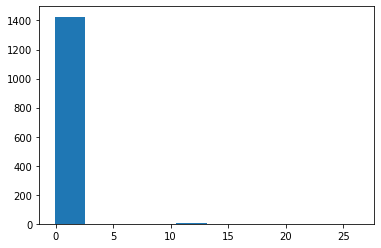

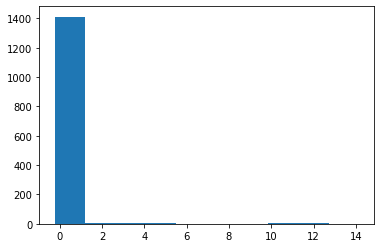

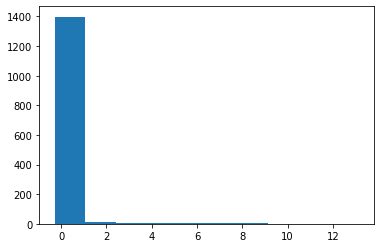

In [42]:
for i in x.columns:
    plt.figure()
    plt.hist(x[i])

In [43]:
#removing outliers

In [45]:
from scipy.stats import zscore

In [46]:
z=np.abs(zscore(x))

In [48]:
threshold=3
print(np.where(z>3))

(array([  28,   28,   28,   28,   28,   28,   28,   28,   28,   28,   28,
         28,   28,   28,   28,   28,   28,   28,   28,   28,   28,   28,
         28,   70,   70,   70,   70,   70,   70,   70,   70,   70,   70,
        102,  107,  115,  115,  115,  115,  115,  115,  115,  115,  115,
        115,  115,  115,  115,  115,  115,  115,  115,  115,  115,  115,
        115,  115,  135,  135,  135,  135,  169,  169,  169,  169,  169,
        169,  169,  169,  169,  169,  169,  169,  169,  169,  169,  190,
        190,  190,  228,  228,  253,  253,  253,  253,  255,  255,  255,
        285,  285,  285,  285,  285,  285,  285,  285,  285,  285,  285,
        285,  285,  285,  287,  294,  302,  302,  302,  302,  302,  302,
        302,  302,  302,  302,  302,  351,  351,  351,  351,  351,  351,
        351,  351,  351,  351,  351,  351,  351,  351,  351,  351,  351,
        351,  351,  351,  351,  370,  370,  370,  370,  397,  397,  397,
        397,  397,  397,  397,  397,  397,  397,  

In [49]:
x_new=x[(z<3).all(axis=1)]

In [50]:
x_new.shape

(1377, 32)

In [51]:
x.shape

(1435, 32)

In [52]:
#implementing linear regression for the dataset

In [53]:
max_r2_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(pred,y_test)
    print("the r2 score correosponding to random state ",r_state,"is: ",r2_scr)
    if max_r2_score<r2_scr:
        max_r2_score=r2_scr
        final_r_state=r_state
        
print()
print()
print("the max r2 score corrosponding to the final random state ",final_r_state,"is: ",max_r2_score)

the r2 score correosponding to random state  42 is:  0.9999999999977687
the r2 score correosponding to random state  43 is:  0.9999999999939704
the r2 score correosponding to random state  44 is:  0.9999999999962046
the r2 score correosponding to random state  45 is:  0.9999999999971749
the r2 score correosponding to random state  46 is:  0.9999999999966892
the r2 score correosponding to random state  47 is:  0.9999999999957399
the r2 score correosponding to random state  48 is:  0.9999999995375604
the r2 score correosponding to random state  49 is:  0.9999999989243369
the r2 score correosponding to random state  50 is:  0.9999999999965575
the r2 score correosponding to random state  51 is:  0.9999999999666146
the r2 score correosponding to random state  52 is:  0.9999999994303743
the r2 score correosponding to random state  53 is:  0.9999999999981187
the r2 score correosponding to random state  54 is:  0.9999999999955488
the r2 score correosponding to random state  55 is:  0.999999999

In [54]:
#finalising the model

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53,test_size=0.33)

In [56]:
lr=LinearRegression()

In [57]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
lr.coef_

array([[-6.96030872e-08, -4.92113827e-07, -2.70173951e-08,
         2.21735084e-02,  2.10966690e-02,  3.14655109e-03,
         4.85562164e-03,  1.82136418e-06,  4.85598200e-03,
         5.13433014e-03,  5.73472991e-03,  3.32948558e-03,
         4.27230414e-03,  1.55551988e-03,  1.21088824e-02,
         5.94566613e-02,  5.81368826e-02,  2.53019754e-02,
         6.88465867e-02,  4.54387395e-02,  9.64429418e-03,
         2.93071119e-02,  1.06125327e-03,  6.74224407e-03,
         1.71501821e-01,  5.48014069e-03,  2.22338109e-02,
         8.76804737e-03,  3.12699216e-02,  1.84294062e-04,
         4.12971839e-02,  4.14727825e-01]])

In [59]:
lr.intercept_

array([8.92205823e-10])

In [60]:
predlr=lr.predict(x_test)

In [61]:
predlr

array([[-1.89510199e-01],
       [-4.73297979e-02],
       [-4.23991966e-02],
       [ 9.29737302e-02],
       [-1.61568388e-01],
       [-2.19217040e-01],
       [ 9.79659901e-02],
       [-2.84378212e-01],
       [ 1.93593409e-01],
       [-2.21974976e-01],
       [-1.88101670e-01],
       [-1.22002351e-01],
       [-2.36883555e-01],
       [-2.20566275e-01],
       [-2.58959573e-01],
       [-2.82206887e-01],
       [-1.93973758e-01],
       [-1.80001748e-01],
       [ 1.42993806e-01],
       [-2.73930076e-01],
       [-2.00019264e-01],
       [-2.20331581e-01],
       [-2.12759170e-01],
       [-1.93914945e-01],
       [-2.16397890e-01],
       [-2.67412548e-01],
       [-2.27376002e-01],
       [-2.42228566e-01],
       [-8.62507655e-02],
       [ 1.54437725e-01],
       [ 9.87264299e-02],
       [-9.93991152e-02],
       [-2.71404088e-01],
       [-2.49977713e-01],
       [-2.48686255e-01],
       [-2.49798592e-01],
       [-1.31217877e-01],
       [ 4.76433441e-01],
       [ 1.3

In [62]:
print(r2_score(predlr,y_test))

0.9999999999981187


In [63]:
print(mean_absolute_error(predlr,y_test))

9.890705172121414e-07


In [64]:
print(mean_squared_error(predlr,y_test))

2.4680776660127145e-12


In [65]:
#using cross val score

In [66]:
from sklearn.model_selection import cross_val_score 

In [67]:
score=cross_val_score(lr,x,y,cv=5)

In [68]:
score

array([1., 1., 1., 1., 1.])

In [69]:
#using other alogorithms

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [71]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),SVR()]

In [73]:
for i in model:
    i.fit(x_train,y_train)
    pred3=i.predict(x_test)
    print("r2 score of",i,"is:",r2_score(y_test,pred3))
    print("mean abs error of",i,"is:",mean_absolute_error(y_test,pred3))
    print("mean squared error of",i,"is:",(mean_squared_error(y_test,pred3)))

r2 score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 0.9460016539587202
mean abs error of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 0.045377343567735005
mean squared error of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_fe

In [74]:
#dumping and loading the dataset

In [75]:
import pickle

In [76]:
filename="crimes.pkl"

In [78]:
pickle.dump(lr,open(filename,'wb'))

In [79]:
#loading the datset

In [81]:
pkl=pickle.load(open(filename,'rb'))

In [82]:
pkl.predict(x_test)

array([[-1.89510199e-01],
       [-4.73297979e-02],
       [-4.23991966e-02],
       [ 9.29737302e-02],
       [-1.61568388e-01],
       [-2.19217040e-01],
       [ 9.79659901e-02],
       [-2.84378212e-01],
       [ 1.93593409e-01],
       [-2.21974976e-01],
       [-1.88101670e-01],
       [-1.22002351e-01],
       [-2.36883555e-01],
       [-2.20566275e-01],
       [-2.58959573e-01],
       [-2.82206887e-01],
       [-1.93973758e-01],
       [-1.80001748e-01],
       [ 1.42993806e-01],
       [-2.73930076e-01],
       [-2.00019264e-01],
       [-2.20331581e-01],
       [-2.12759170e-01],
       [-1.93914945e-01],
       [-2.16397890e-01],
       [-2.67412548e-01],
       [-2.27376002e-01],
       [-2.42228566e-01],
       [-8.62507655e-02],
       [ 1.54437725e-01],
       [ 9.87264299e-02],
       [-9.93991152e-02],
       [-2.71404088e-01],
       [-2.49977713e-01],
       [-2.48686255e-01],
       [-2.49798592e-01],
       [-1.31217877e-01],
       [ 4.76433441e-01],
       [ 1.3